In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shareddrives/MATH 2327 3439 - Data/'

Mounted at /content/drive


### Loading the Data

In [ ]:
df = pd.read_csv(drive_dir + 'data/fake_job_postings.csv')

### Looking into the Data

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.shape

(17880, 18)

In [ ]:
df.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

### Look at how many rows of missing data are there in each column

In [ ]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Looking at the percentage of rows that have missing data for each column

In [ ]:
df.isna().sum() / df.shape[0] * 100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

### Looking at patterns around missing data

In [ ]:
fraudulent_df = df[df['fraudulent']==1]

In [ ]:
fraudulent_df.isna().sum() / fraudulent_df.shape[0] *100

job_id                  0.000000
title                   0.000000
location                2.193995
department             61.316397
salary_range           74.249423
company_profile        67.782910
description             0.115473
requirements           17.782910
benefits               42.032333
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        27.829099
required_experience    50.230947
required_education     52.078522
industry               31.755196
function               38.914550
fraudulent              0.000000
dtype: float64

In [ ]:
real_df = df[df['fraudulent']==0]

In [ ]:
real_df.isna().sum() / real_df.shape[0] *100

job_id                  0.000000
title                   0.000000
location                1.921947
department             64.746679
salary_range           84.453979
company_profile        15.992712
description             0.000000
requirements           14.934760
benefits               40.237452
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        18.984366
required_experience    38.879746
required_education     44.986482
industry               27.201128
function               35.958622
fraudulent              0.000000
dtype: float64

In [ ]:
abs((fraudulent_df.isna().sum() / fraudulent_df.shape[0] *100)-(real_df.isna().sum() / real_df.shape[0] *100))

job_id                  0.000000
title                   0.000000
location                0.272049
department              3.430282
salary_range           10.204556
company_profile        51.790198
description             0.115473
requirements            2.848150
benefits                1.794881
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type         8.844733
required_experience    11.351201
required_education      7.092040
industry                4.554068
function                2.955927
fraudulent              0.000000
dtype: float64

Text(0.5, 1.0, 'Salary Range')

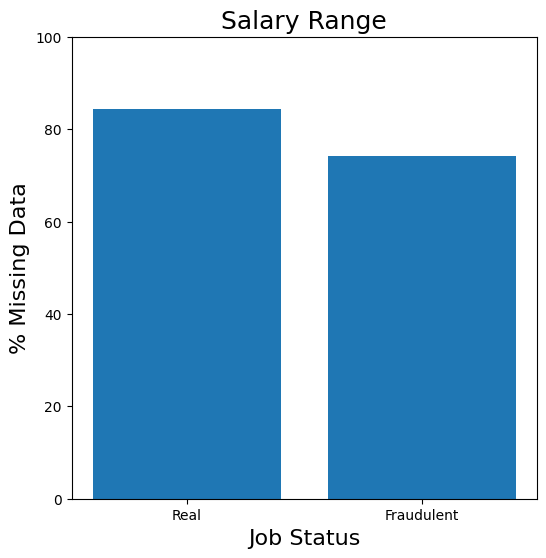

In [ ]:
# salary range
plt.figure(figsize=(6,6))
plt.bar(['Real', 'Fraudulent'], [84.453979, 74.249423])
plt.ylabel('% Missing Data', fontsize = 16)
plt.xlabel('Job Status', fontsize = 16)
plt.ylim(0,100)
plt.title('Salary Range', fontsize=18)

Text(0.5, 1.0, 'Company Profile')

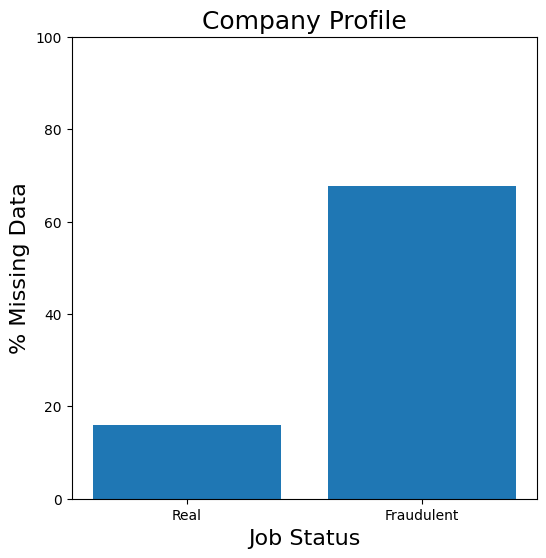

In [ ]:
# company profile
plt.figure(figsize=(6,6))
plt.bar(['Real', 'Fraudulent'], [15.992712, 67.78291])
plt.ylabel('% Missing Data', fontsize = 16)
plt.xlabel('Job Status', fontsize = 16)
plt.ylim(0,100)
plt.title('Company Profile', fontsize=18)

### Looking for patterns around 'fraudulent' jobs

Looking at how many jobs in this data set are fraudulent

In [ ]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [ ]:
866/17880 * 100

4.8434004474272925

Grouping by Job Function to see if there is a relationship between particular job functions and whether or not a job posting is fraudulent

In [ ]:
df['function'].nunique()

37

In [ ]:
df['function'].value_counts()

Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

In [ ]:
# subset job functions that only appear over 100 times
function_df = df[df.groupby('function')['function'].transform('size')>200]

In [ ]:
# get the mean fradulency in relation to job function (i.e., proportion of fraudulent job postings per job function)
func_df = function_df.groupby([function_df['function']]).agg({'fraudulent':['mean']}).reset_index()
func_df = func_df.sort_values(by=[('fraudulent', 'mean')], ascending=False)

Text(0.5, 0, 'Job Function')

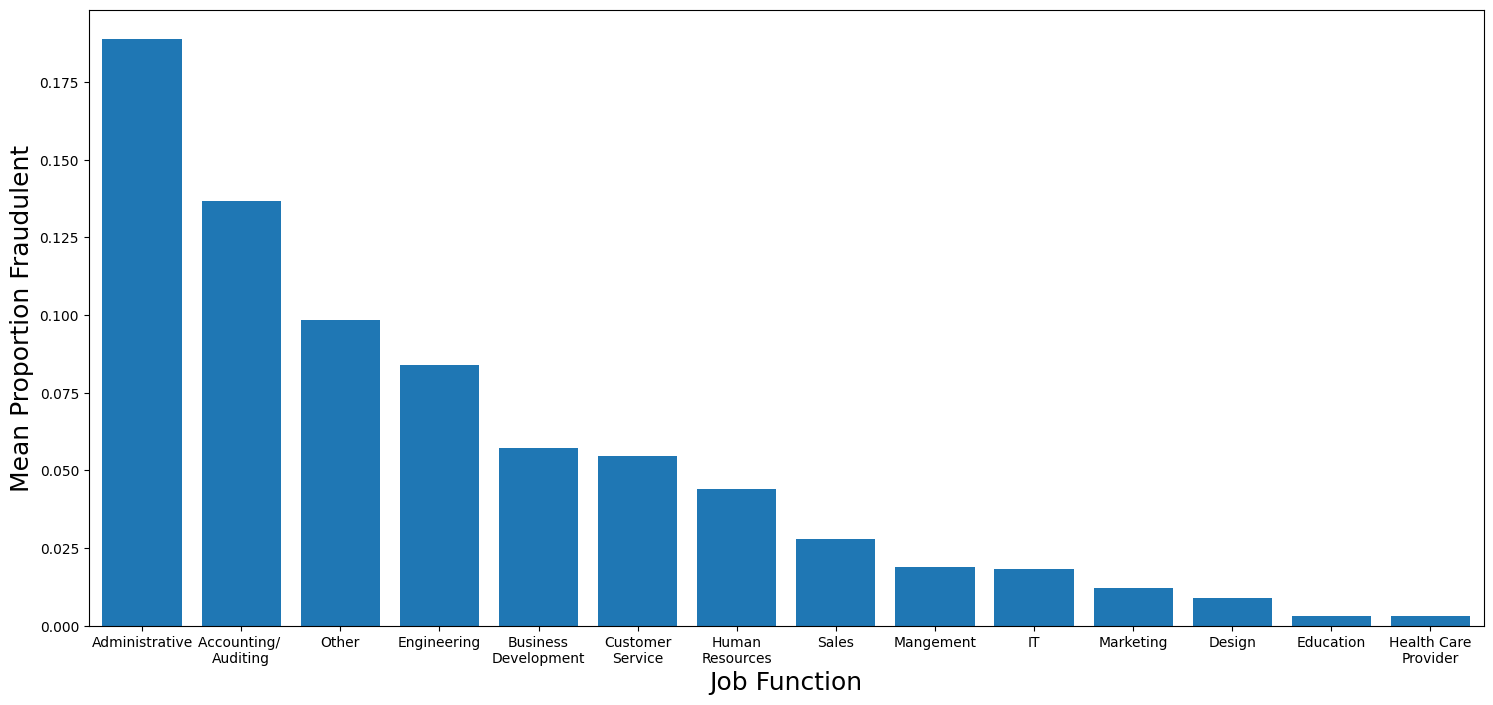

In [ ]:
plt.figure(figsize=(18,8))
plt.margins(x=0.01)
plt.bar(func_df['function'], func_df[('fraudulent', 'mean')])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],
           ['Administrative', 'Accounting/ \nAuditing', 'Other','Engineering', 'Business\nDevelopment',
            'Customer\nService', 'Human\nResources', 'Sales','Mangement', 'IT', 'Marketing',
            'Design','Education', 'Health Care\nProvider'])

plt.ylabel('Mean Proportion Fraudulent',fontsize=18)
plt.xlabel('Job Function', fontsize=18)

In [ ]:
# checking work to double check that we are looking at the mean for each job function (i.e., sum shouldn't equal 1)
func_df[('fraudulent', 'mean')].sum()

0.7554666172872054

Grouping by Industry to see if there is a relationship between particular job industries and whether or not a job posting is fraudulent
*   Done similarly to Job Functions



In [ ]:
df['industry'].nunique()

131

In [ ]:
df['industry'].value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 131, dtype: int64

In [ ]:
# subset industries that only appear over 100 times
industry_df = df[df.groupby('industry')['industry'].transform('size')>200]

In [ ]:
industry_df['industry'].value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
Financial Services                      779
Hospital & Health Care                  497
Consumer Services                       358
Telecommunications                      342
Oil & Energy                            287
Retail                                  223
Name: industry, dtype: int64

In [ ]:
ind_df = industry_df.groupby([industry_df['industry']]).agg({'fraudulent':['mean']}).reset_index()
ind_df = ind_df.sort_values(by=[('fraudulent', 'mean')], ascending=False)

Text(0.5, 0, 'Industry')

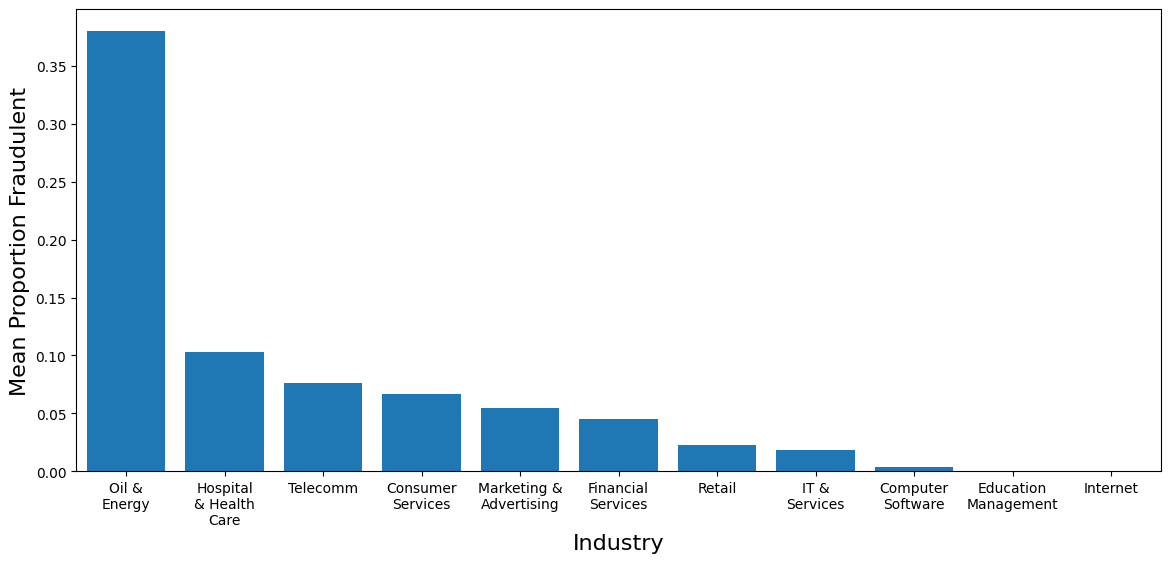

In [ ]:
plt.figure(figsize=(14,6))
plt.bar(ind_df['industry'], ind_df[('fraudulent', 'mean')])
plt.margins(x=0.01)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],
           ['Oil &\nEnergy','Hospital\n& Health\nCare',
            'Telecomm', 'Consumer\nServices','Marketing &\nAdvertising',
            'Financial\nServices','Retail',
            'IT &\nServices','Computer\nSoftware', 'Education\nManagement',
            'Internet'])
plt.ylabel('Mean Proportion Fraudulent', fontsize=16)
plt.xlabel('Industry', fontsize=16)

In [ ]:
ind_df[('fraudulent', 'mean')].sum()

0.7692560418326805

Grouping by Required Education Level to see if there is a relationship between particular required education levels and whether or not a job posting is fraudulent
*   Done similarly to Job Functions and Industry



In [ ]:
df['required_education'].nunique()

13

In [ ]:
df['required_education'].value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [ ]:
edu_df = df.groupby([df['required_education']]).agg({'fraudulent':['mean']}).reset_index()
edu_df = edu_df.sort_values(by=[('fraudulent', 'mean')], ascending=False)

Text(0.5, 0, 'Education Level')

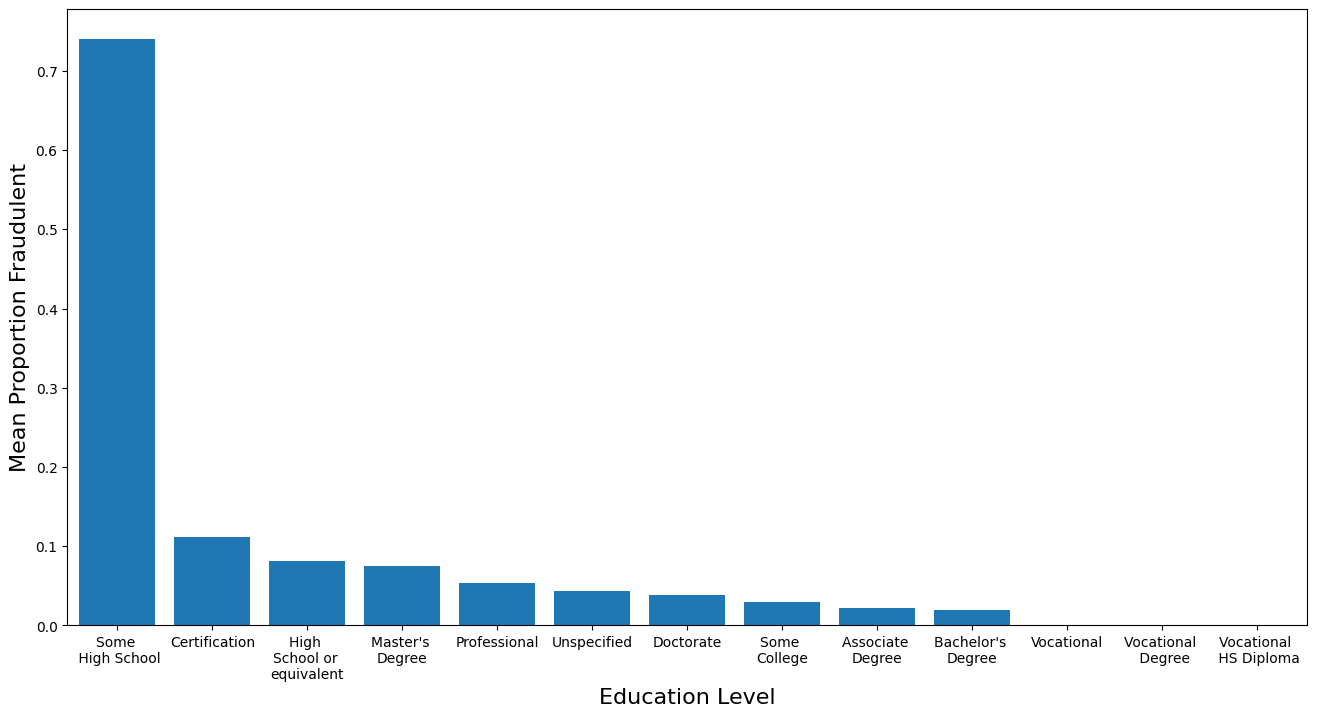

In [ ]:
plt.figure(figsize=(16,8))
plt.margins(x=0.01)
plt.bar(edu_df['required_education'], edu_df[('fraudulent', 'mean')])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12], ['Some \n High School', 'Certification','High \nSchool or \nequivalent',
                                            'Master\'s \nDegree', 'Professional', 'Unspecified', 'Doctorate',
                                            'Some \nCollege', 'Associate \nDegree', 'Bachelor\'s \nDegree',
                                            'Vocational', 'Vocational \n Degree', 'Vocational \n HS Diploma'])
plt.ylabel('Mean Proportion Fraudulent', fontsize=16)
plt.xlabel('Education Level', fontsize=16)

In [ ]:
edu_df[('fraudulent', 'mean')].sum()

1.215681956451407